In [1]:
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

from discretize import TensorMesh
from discretize.utils import mkvc, active_from_xyz
from simpeg.utils import plot2Ddata, model_builder
from simpeg import maps
from simpeg.potential_fields import magnetics

write_output = False

import torch 



## This model is of the Cerro Machin Geothermal Area and was created within the framework of project 8091 through the digitization of geological cross-sections in the Gempy library. The geological cross-sections were extracted from the study by Beltrán (2022), and represent shallow volcanic layers resulting from volcanic events, a volcanic conduit that connect to a deep magma chamber. It has dimensions of X=12000 m, Y=11000 m, and Z=9000 m

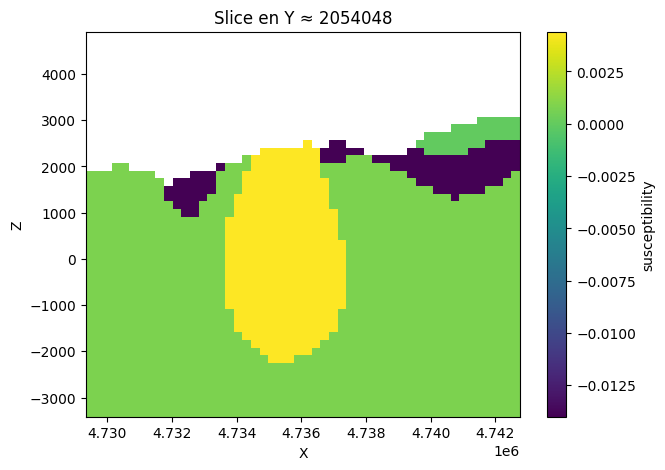

In [2]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelA/mag_modelA.npz")
model = model_npz["Mag_model"]         
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nz, ny, nx), order="F")  


target_y = 2054000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="susceptibility")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


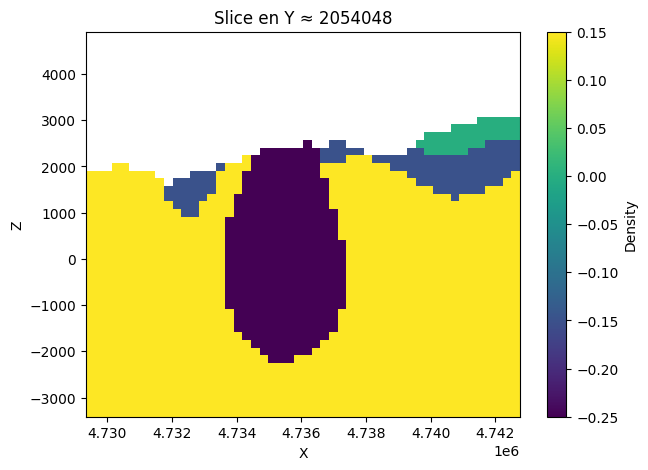

In [3]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelA/grav_modelA.npz")
model = model_npz["Grav_model"]        
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nz, ny, nx), order="F") 


target_y = 2054000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="Density")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

In [4]:
# model.shape
centers.shape

(125000, 3)

## This model is of the Cerro Machin Geothermal Area, have the resistivity propierty and was created within the framework of project 8091 through the digitization of geological cross-sections in the Gempy library. The geological cross-sections were extracted from the study by Beltrán (2022), and represent shallow volcanic layers resulting from volcanic events, a volcanic conduit that connect to a deep magma chamber. It has dimensions of X=12000 m, Y=11000 m, and Z=9000 m

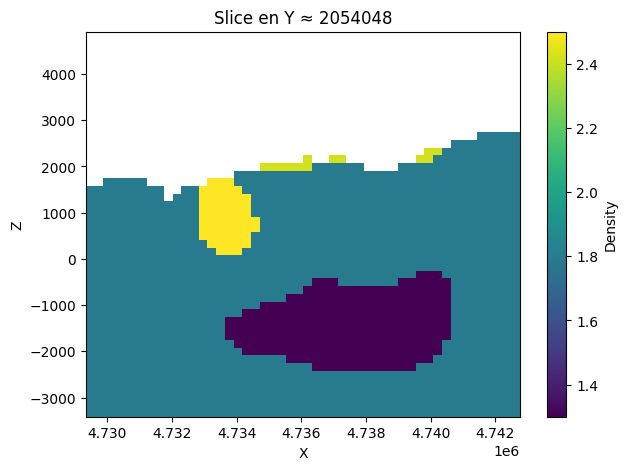

In [5]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelB/res_modelB.npz")
model = model_npz["Res_model"]        
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nz, ny, nx), order="F") 


target_y = 2054000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="Density")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

In [6]:
# model.shape
centers.shape

(125000, 3)

## This model is of the Purace Geothermal Area and was created within the framework of project 8091 through the digitization of geological cross-sections in the Gempy library. The geological cross-sections were extracted from the study by Cortes, 2020, and represent shallow volcanic layers resulting from volcanic events, a volcanic conduit surrounded by alteration zones that connect to a deep magma chamber. It has dimensions of X=18000 m, Y=11000 m, and Z=6000 m

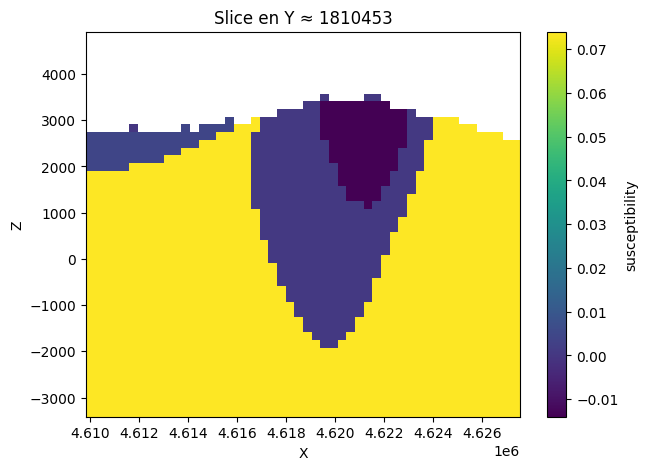

In [7]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelC/mag_modelC.npz")
model = model_npz["Mag_model"]         
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nz, ny, nx), order="F")  


target_y = 1810295
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="susceptibility")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


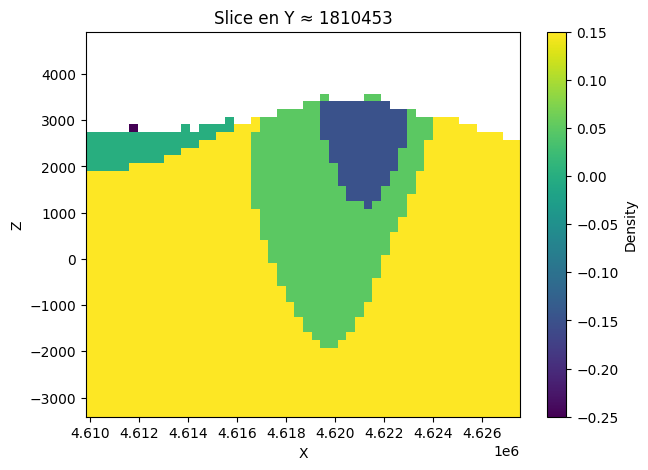

In [8]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelC/grav_modelC.npz")
model = model_npz["Grav_model"]        
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nz, ny, nx), order="F") 


target_y = 1810295
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="Density")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


In [9]:
# model.shape
centers.shape

(125000, 3)

## This model is of the Azufral Geothermal Area and was created within the framework of project 8091 through the digitization of geological cross-sections in the Gempy library. The geological cross-sections were extracted from the study by Gutiérrez, 2020, and represent shallow volcanic layers resulting from volcanic events, a volcanic structures and bodies which represents hidrothermal alteration area and sell layer. It has dimensions of X=20000 m, Y=19000 m, and Z=6000 m

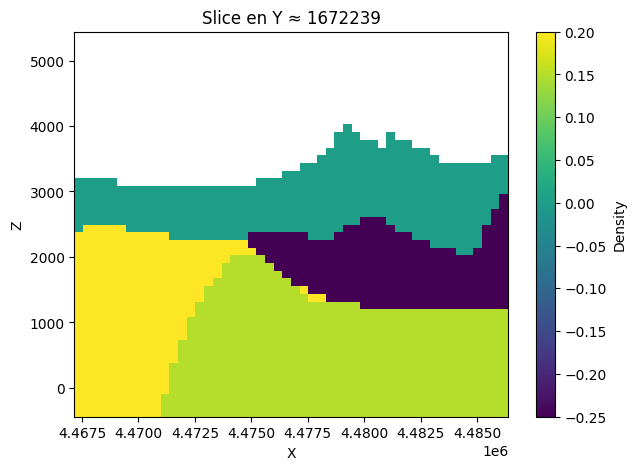

In [10]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelD/grav_modelD.npz")
model = model_npz["Grav_model"]         # (N,)
centers = model_npz["cell_centers"]    # (N, 3)


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nz, ny, nx), order="F") 


target_y = 1672477
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="Density")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

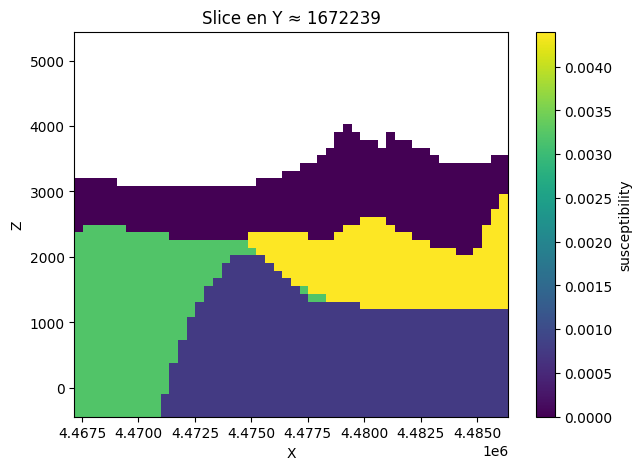

In [11]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelD/mag_modelD.npz")
model = model_npz["Mag_model"]         # (N,)
centers = model_npz["cell_centers"]    # (N, 3)


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nz, ny, nx), order="F")  


target_y = 1672477
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(7,5))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="susceptibility")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

In [12]:
# model.shape
centers.shape

(125000, 3)